In [1]:
%load_ext autoreload
%autoreload 2
import torch
import copy
import numpy as np
import matplotlib.pyplot as plt

from src.models.training.train import TrainModule
from src.loop_calling.dataset.loop_dataset import LoopDataset
from src.utils import predict_matrix, plot_and_save_matrices, load_bigwig_signal
from src.ledidi.edit_tasks import evaluate_extruding_to_stable
from src.ledidi.utils import report_nt_changes
from src.ledidi.utils import plot_multi_site_attributions

/cluster/work/boeva/shoenig/conda/envs/chiron/lib/python3.10/site-packages/lightning_fabric/__init__.py:29: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)


In [2]:
%%capture
CKPT="../data/chiron-model.ckpt"
model = TrainModule.load_from_checkpoint(CKPT)
model.eval()
model.to("cuda")

In [3]:
dataset = LoopDataset(
        regions_file_path="../data/extruding_loops.csv",
        cool_file_path="../data/A673_WT_CTCF_5000.cool",
        fasta_dir="../data/chromosomes",
        genomic_feature_path=None,
        mode="test",
        val_chroms=[],
        test_chroms=["chr2", "chr6", "chr19"],
        use_pretrained_backbone=True
    )

In [5]:
elem = dataset[872]
pred = predict_matrix(elem, model, 'cuda')

In [6]:
elem["idx"] = 872

In [9]:
evaluate_extruding_to_stable(elem, model, device="cuda", run_dir="ex3")

[EXTR→STABLE] corner=1.310, ratio=0.727, ratio_min=1.227
iter=I	input_loss=0.0	output_loss=25.01	total_loss=25.01	time=0.0
iter=100	input_loss=1.507e+03	output_loss=0.05462	total_loss=120.6	time=41.55
iter=200	input_loss=837.0	output_loss=0.01161	total_loss=66.97	time=40.25
iter=300	input_loss=598.0	output_loss=1.727	total_loss=49.57	time=40.38
iter=400	input_loss=438.0	output_loss=0.1363	total_loss=35.18	time=40.35
iter=500	input_loss=349.0	output_loss=0.07695	total_loss=28.0	time=40.4
iter=600	input_loss=286.0	output_loss=0.2229	total_loss=23.1	time=40.42
iter=700	input_loss=298.0	output_loss=0.1255	total_loss=23.97	time=40.44
iter=800	input_loss=248.0	output_loss=0.08901	total_loss=19.93	time=40.46
iter=900	input_loss=202.0	output_loss=0.1204	total_loss=16.28	time=40.44
iter=1000	input_loss=209.0	output_loss=0.04473	total_loss=16.76	time=40.44
iter=1100	input_loss=191.0	output_loss=0.03251	total_loss=15.31	time=40.42
iter=1200	input_loss=196.0	output_loss=0.05433	total_loss=15.73	ti

In [10]:
import copy
updated = torch.load("./ex3/chr2/best_onehot_872.pt")
deep_copy = copy.deepcopy(elem)
deep_copy['sequence'] = updated
pred_all = predict_matrix(deep_copy, model, 'cuda')

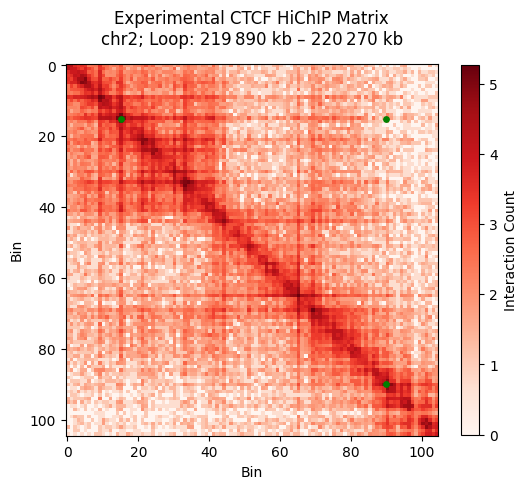

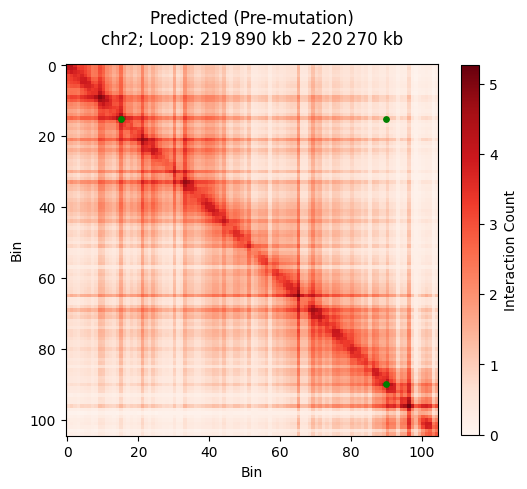

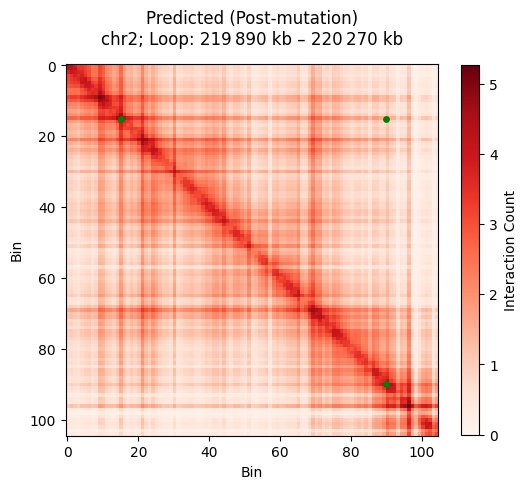

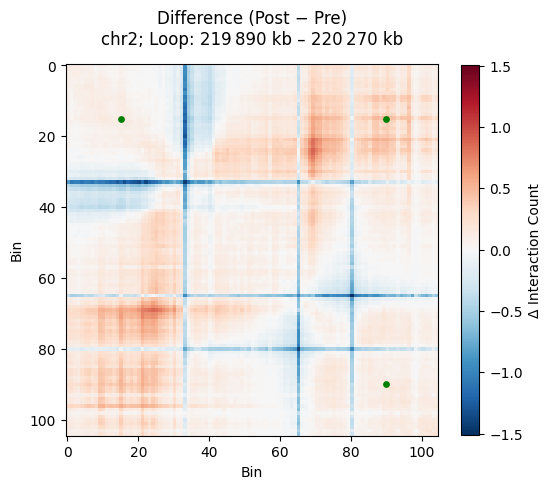

{'exp': '872/Extruding_To_Stable_exp.png',
 'pre': '872/Extruding_To_Stable_pred_pre.png',
 'post': '872/Extruding_To_Stable_pred_post.png',
 'diff': '872/Extruding_To_Stable_diff.png'}

In [17]:
%matplotlib inline
plot_and_save_matrices(elem, pred, pred_all, save_dir="872", prefix="Extruding_To_Stable", show=True)

In [12]:
edits = report_nt_changes(elem["sequence"], deep_copy["sequence"])

Total sequence-positions with any mismatch: 4
169350: C → G
204958: C → A
327574: G → C
402355: G → T


/cluster/work/boeva/shoenig/RECOMB/Chiron3D/src/ledidi/utils.py:214: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  ymin = float(torch.min(torch.min(orig_slice), torch.min(upd_slice)))


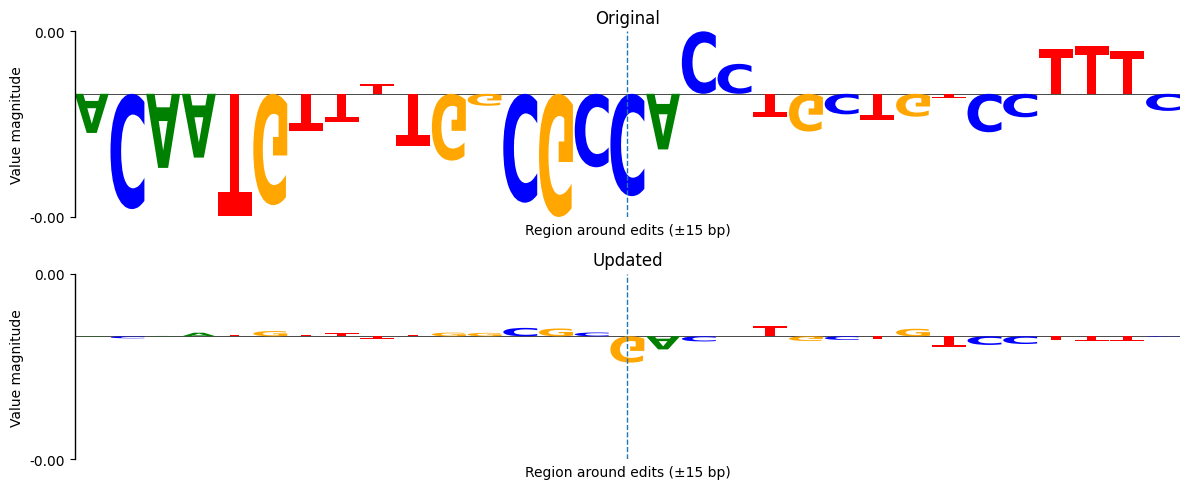

In [13]:
plot_multi_site_attributions(model, elem, [(169350, 'C', 'G')], window_radius=15)

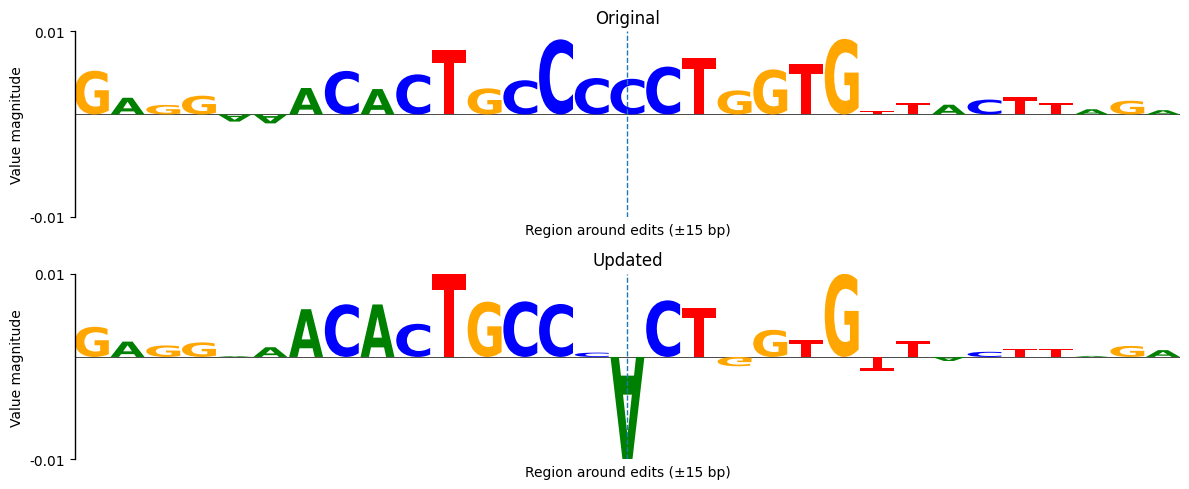

In [14]:
plot_multi_site_attributions(model, elem, [(204958, 'C', 'A')], window_radius=15)

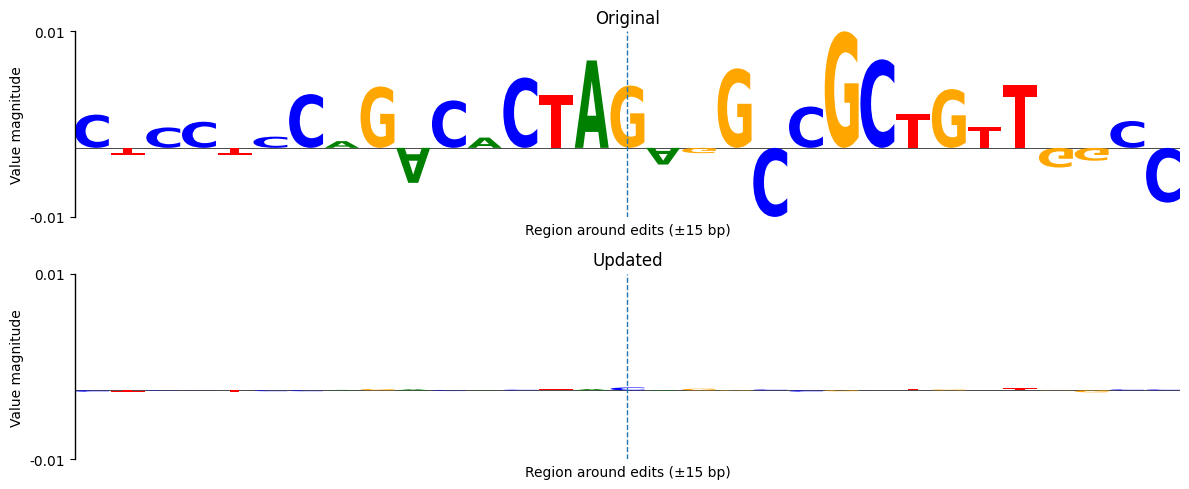

In [15]:
plot_multi_site_attributions(model, elem, [(327574, 'G', 'C'),], window_radius=15)

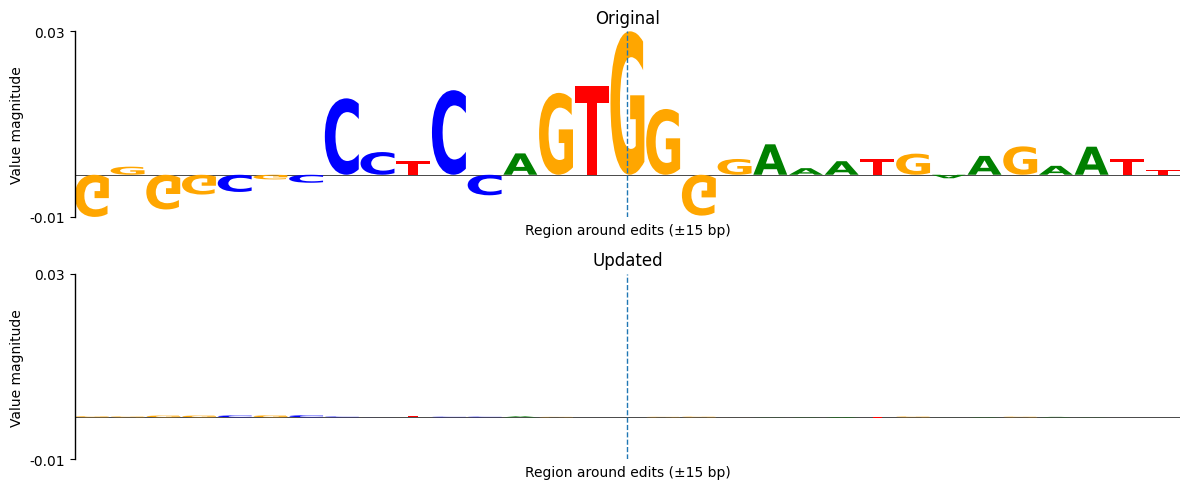

In [16]:
plot_multi_site_attributions(model, elem, [(402355, 'G', 'T')], window_radius=15)